In [ ]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [ ]:
kmpgex = pd.ExcelFile('KPMG_ccv.xlsx')
kmpgex.sheet_names
df = pd.read_excel('KPMG_ccv.xlsx',"CustomerDemographic")
#list(df)

In [ ]:
# rename for easier analysis
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"fname",
                   "Unnamed: 2":"lname",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT"}, inplace = True)
df.rename(columns={"Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tencure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,owns_car,tenure,Unnamed: 14
1,2,Eli,Bockman,Male,81,1980-12-16,42.235516,Administrative Officer,Financial Services,Mass Customer,N,NaN,Yes,16.0,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,69.158804,Recruiting Manager,Property,Mass Customer,N,NaN,Yes,15.0,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,61.451955,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,45.832777,Senior Editor,NaN,Affluent Customer,N,NaN,Yes,8.0,NaN
5,6,Curr,Duckhouse,Male,35,1966-09-16,56.495790,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,47.594420,VP Product Management,Health,Mass Customer,N,NaN,No,19.0,NaN
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,21.649215,Statistician II,Manufacturing,High Net Worth,N,NaN,Yes,1.0,NaN
3997,3998,Sarene,Woolley,U,60,NaT,123.251955,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,49.386201,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,NaN


In [ ]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_NA()

def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(3, 13):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

In [ ]:
#array(['F', 'Male', 'Female', 'U', 'Femal', 'M'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)



[2038, 1873, 88]


([<matplotlib.axis.XTick at 0x7f2b2e80a970>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

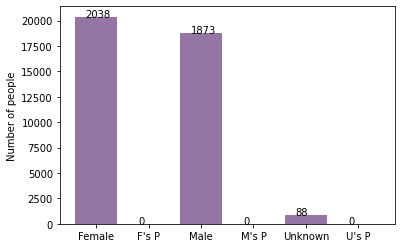

In [ ]:
bike = [0,0,0]


grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x7f2b2eca4eb0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

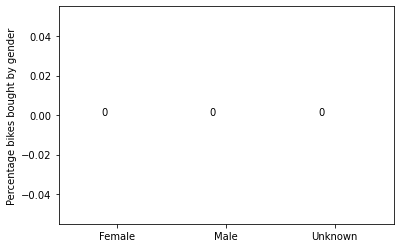

In [ ]:
avg  = [0,0,0]
ss   = sum(bike)


x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [ ]:
#Analyze on the age vs bikes bought
#Needs to transform
print(df["DOB"][1].ctime().split(" ")[4])
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[tl-1])) 
    #time is float: means it's nan value so do nothing
print(k)

#same index as above
ngenage = [0,0,0]
j       = 1
ss      = 0
stdv    = []
for each in df['gender']:
    if each[0] == "F" and df['Age'][j] != 0:
        ss   += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[0] += 1
    elif each[0] == "M" and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[1] += 1
    elif df['Age'][j] != 0: 
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[2] += 1
    j += 1
print(ss)
print(ngenage) # as we can see, unknonwn gender will unlikely to have age, don't care about gender U
#average age not counting 0 is 
mean_val = round(ss/sum(ngenage),0)
print(mean_val)
stdv_val = round(ma.sqrt(1/(sum(ngenage)-1)*sum((stdv - (ss/sum(ngenage)))**2)),0)
print(stdv_val)


1980


ValueError: ignored